## This code is used to (i) compute and plot miscalibration area in Figure 6 and (ii) plot ECP in Figure 10 in the Appendix.

In [6]:
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import torch


In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


## $M_\mathrm{gas}$

In [8]:
field      = 'Mgas'
results_dir = Path("results/")

ecp_levels_A = np.load(results_dir / '{:s}_ecp_levels_Astrid_LH_test.npy'.format(field))
ecp_levels_S = np.load(results_dir / '{:s}_ecp_levels_SIMBA_LH_test.npy'.format(field))
ecp_levels_I = np.load(results_dir / '{:s}_ecp_levels_IllustrisTNG_LH_test.npy'.format(field))

ecp_vals_A = np.load(results_dir / '{:s}_ecp_vals_Astrid_LH_test.npy'.format(field))
ecp_vals_S = np.load(results_dir / '{:s}_ecp_vals_SIMBA_LH_test.npy'.format(field))
ecp_vals_I = np.load(results_dir / '{:s}_ecp_vals_IllustrisTNG_LH_test.npy'.format(field))

percentile_A = np.load(results_dir / f'{field}_log_evidence_percentile_Astrid_CV.npy')
percentile_I = np.load(results_dir / f'{field}_log_evidence_percentile_IllustrisTNG_CV.npy')
percentile_S = np.load(results_dir / f'{field}_log_evidence_percentile_SIMBA_CV.npy')

percentiles = [percentile_I, percentile_A, percentile_S]

k_min, k_max   = 2., 45
k_smooth_array = np.logspace(np.log10(k_min), np.log10(k_max), num=10)
k_smooth_array

array([ 2.        ,  2.826653  ,  3.99498359,  5.64621617,  7.97994694,
       11.27827048, 15.93987854, 22.52825274, 31.83977659, 45.        ])

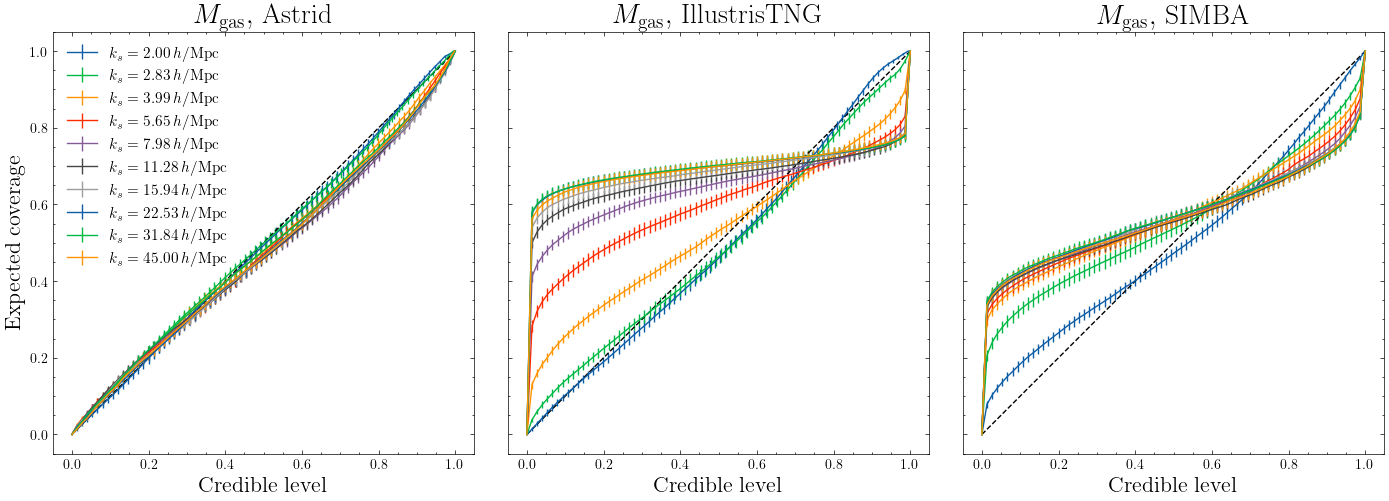

In [9]:
plt.style.use('science')

fig, axs = plt.subplots(1, 3, figsize=(14, 5), sharey=True, sharex=True, constrained_layout=True)
axs[0].set_title(r'$M_{\mathrm{gas}},$'+' Astrid', fontsize=20)
for i, (levels, coverages) in enumerate(zip(ecp_levels_A, ecp_vals_A)):
    axs[0].errorbar(levels, np.mean(coverages, axis=0), yerr=np.std(coverages, axis=0),
                 label = r'$k_s = {:.2f} \, h/$'.format(k_smooth_array[i]) + 'Mpc')
axs[0].plot([0, 1], [0, 1], color='k', linestyle='--')
axs[0].set_xlabel(r'Credible level', fontsize=16)
axs[0].set_ylabel(r'Expected coverage', fontsize=16)
axs[0].legend(loc='best', fontsize=11)
axs[0].set_aspect('equal')

axs[1].set_title(r'$M_{\mathrm{gas}},$'+' IllustrisTNG', fontsize=20)
for i, (levels, coverages) in enumerate(zip(ecp_levels_I, ecp_vals_I)):
    axs[1].errorbar(levels, np.mean(coverages, axis=0), yerr=np.std(coverages, axis=0),
                 label = r'$k_s = {:.2f} \, h/$'.format(k_smooth_array[i]) + 'Mpc')
axs[1].plot([0, 1], [0, 1], color='k', linestyle='--')
axs[1].set_xlabel(r'Credible level', fontsize=16)
axs[1].set_aspect('equal')

axs[2].set_title(r'$M_{\mathrm{gas}},$'+' SIMBA', fontsize=20)
for i, (levels, coverages) in enumerate(zip(ecp_levels_S, ecp_vals_S)):
    axs[2].errorbar(levels, np.mean(coverages, axis=0), yerr=np.std(coverages, axis=0),
                 label = r'$k_s = {:.2f} \, h/$'.format(k_smooth_array[i]) + 'Mpc')
axs[2].plot([0, 1], [0, 1], color='k', linestyle='--')
axs[2].set_xlabel(r'Credible level', fontsize=16)
axs[2].set_aspect('equal')

plt.savefig(f'plots/5_coverage_{field}_all.pdf')
plt.show()


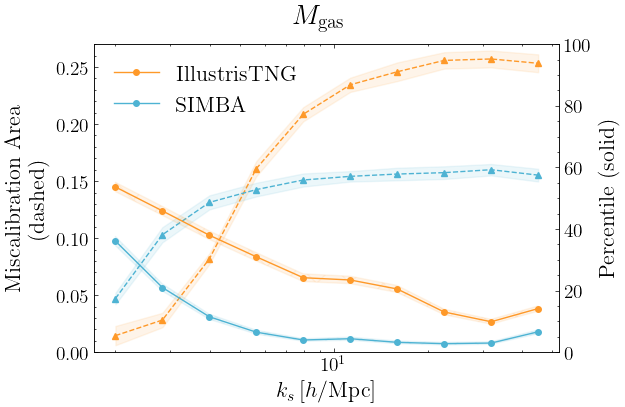

In [12]:
# Compute and plot miscalibration Area
misc_area_A = np.trapz(np.abs(ecp_vals_A - ecp_levels_A[:, None]), ecp_levels_A[:, None], axis=-1)
misc_area_S = np.trapz(np.abs(ecp_vals_S - ecp_levels_S[:, None]), ecp_levels_S[:, None], axis=-1)
misc_area_I = np.trapz(np.abs(ecp_vals_I - ecp_levels_I[:, None]), ecp_levels_I[:, None], axis=-1)

# for IllustrisTNG, the first k_s posterior is underconfident
misc_area_I[0] = np.abs(np.trapz((ecp_levels_I[0]-ecp_vals_I[0]), ecp_levels_I[0], axis=-1))


## Plot
plt.style.use('science')
colors =  ['#f768a1', '#fe9929', '#4eb3d3',]
msize=4

f, ax1 = plt.subplots(1, 1, figsize=(6, 4))
f.suptitle(r'$M_{\mathrm{gas}}$', fontsize=20)

## Bias
# IllustrisTNG
misc_area_mean, misc_area_err = misc_area_I.mean(axis=-1), misc_area_I.std(axis=-1)
color = colors[1]
ax1.plot(k_smooth_array, misc_area_mean,
         c=color, marker='^', ls='--', markersize=msize)
ax1.fill_between(k_smooth_array, 
                 (misc_area_mean - misc_area_err), 
                 (misc_area_mean + misc_area_err), 
                 alpha=0.1, color=color)

# SIMBA
misc_area_mean, misc_area_err = misc_area_S.mean(axis=-1), misc_area_S.std(axis=-1)
color = colors[2]
ax1.plot(k_smooth_array, misc_area_mean,
         c=color, marker='^', ls='--', markersize=msize)
ax1.fill_between(k_smooth_array, 
                 (misc_area_mean - misc_area_err), 
                 (misc_area_mean + misc_area_err), 
                 alpha=0.1, color=color)

ax1.set_ylabel('Miscalibration Area \n(dashed)', fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.set_xlabel(r'$ k_s \, [h/\mathrm{Mpc}]$', fontsize=16)
ax1.set_xscale('log')
ax1.set_ylim(0, 0.27)


## Percentile
ax2 = ax1.twinx()

# IllustrisTNG
percentile_mean, percentile_err = percentile_I.mean(axis=1), percentile_I.std(axis=1)/np.sqrt(405)
color = colors[1]
line1, = ax2.plot(k_smooth_array, percentile_mean, 
         c=color, marker='o', markersize=msize)
ax2.fill_between(k_smooth_array, 
                 (percentile_mean - percentile_err), 
                 (percentile_mean + percentile_err), 
                 alpha=0.1, color=color, hatch="X")

# SIMBA
percentile_mean, percentile_err = percentile_S.mean(axis=1), percentile_S.std(axis=1)/np.sqrt(405)
color = colors[2]
line2, = ax2.plot(k_smooth_array, percentile_mean, 
         c=color, marker='o', markersize=msize)
ax2.fill_between(k_smooth_array, 
                 (percentile_mean - percentile_err), 
                 (percentile_mean + percentile_err), 
                 alpha=0.1, color=color, hatch="X")

ax2.set_ylabel('Percentile (solid)', fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.set_ylim(0, 100)

ax2.legend(handles=[line1, line2], labels=['IllustrisTNG', 'SIMBA'], loc='upper left', fontsize=16)
plt.savefig(f'plots/7_misc_area_vs_percentile_{field}.pdf')
f.show()


## $M_\mathrm{tot}$

In [13]:
field      = 'Mtot'
results_dir = Path("results/")

ecp_levels_A = np.load(results_dir / '{:s}_ecp_levels_Astrid_LH_test.npy'.format(field))
ecp_levels_S = np.load(results_dir / '{:s}_ecp_levels_SIMBA_LH_test.npy'.format(field))
ecp_levels_I = np.load(results_dir / '{:s}_ecp_levels_IllustrisTNG_LH_test.npy'.format(field))

ecp_vals_A = np.load(results_dir / '{:s}_ecp_vals_Astrid_LH_test.npy'.format(field))
ecp_vals_S = np.load(results_dir / '{:s}_ecp_vals_SIMBA_LH_test.npy'.format(field))
ecp_vals_I = np.load(results_dir / '{:s}_ecp_vals_IllustrisTNG_LH_test.npy'.format(field))

percentile_A = np.load(results_dir / f'{field}_log_evidence_percentile_Astrid_CV.npy')
percentile_I = np.load(results_dir / f'{field}_log_evidence_percentile_IllustrisTNG_CV.npy')
percentile_S = np.load(results_dir / f'{field}_log_evidence_percentile_SIMBA_CV.npy')

percentiles = [percentile_I, percentile_A, percentile_S]

k_min, k_max   = 2., 45
k_smooth_array = np.logspace(np.log10(k_min), np.log10(k_max), num=10)
k_smooth_array

array([ 2.        ,  2.826653  ,  3.99498359,  5.64621617,  7.97994694,
       11.27827048, 15.93987854, 22.52825274, 31.83977659, 45.        ])

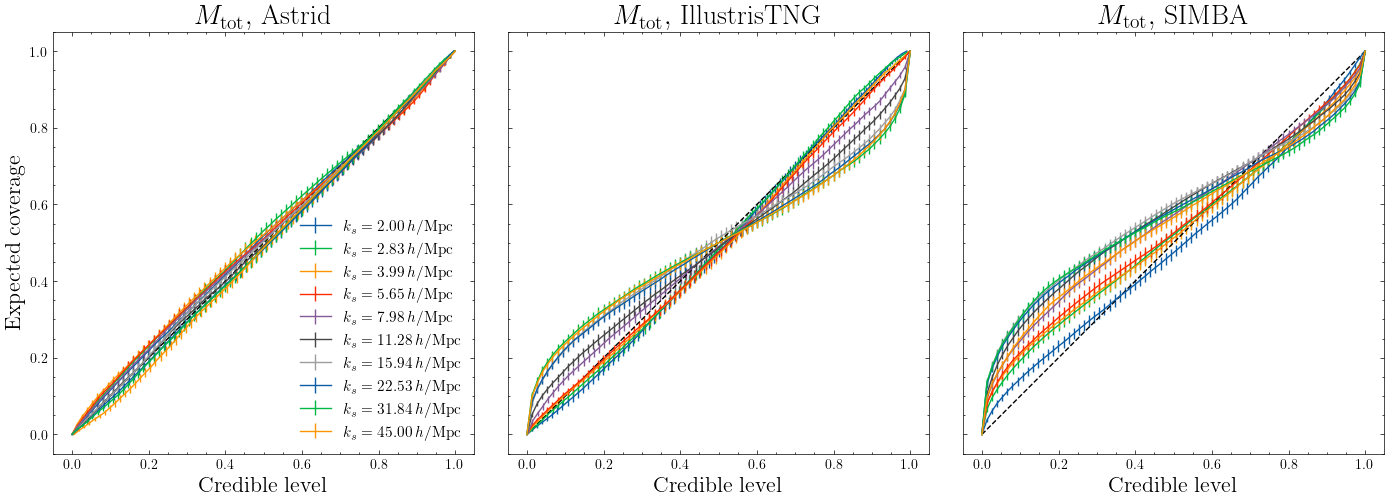

In [15]:
plt.style.use('science')

fig, axs = plt.subplots(1, 3, figsize=(14, 5), sharey=True, sharex=True, constrained_layout=True)
axs[0].set_title(r'$M_{\mathrm{tot}},$'+' Astrid', fontsize=20)
for i, (levels, coverages) in enumerate(zip(ecp_levels_A, ecp_vals_A)):
    axs[0].errorbar(levels, np.mean(coverages, axis=0), yerr=np.std(coverages, axis=0),
                 label = r'$k_s = {:.2f} \, h/$'.format(k_smooth_array[i]) + 'Mpc')
axs[0].plot([0, 1], [0, 1], color='k', linestyle='--')
axs[0].set_xlabel(r'Credible level', fontsize=16)
axs[0].set_ylabel(r'Expected coverage', fontsize=16)

axs[0].legend(loc='best', fontsize=11)
axs[0].set_aspect('equal')

axs[1].set_title(r'$M_{\mathrm{tot}},$'+' IllustrisTNG', fontsize=20)
for i, (levels, coverages) in enumerate(zip(ecp_levels_I, ecp_vals_I)):
    axs[1].errorbar(levels, np.mean(coverages, axis=0), yerr=np.std(coverages, axis=0),
                 label = r'$k_s = {:.2f} \, h/$'.format(k_smooth_array[i]) + 'Mpc')
axs[1].plot([0, 1], [0, 1], color='k', linestyle='--')
axs[1].set_xlabel(r'Credible level', fontsize=16)
axs[1].set_aspect('equal')

axs[2].set_title(r'$M_{\mathrm{tot}},$'+' SIMBA', fontsize=20)
for i, (levels, coverages) in enumerate(zip(ecp_levels_S, ecp_vals_S)):
    axs[2].errorbar(levels, np.mean(coverages, axis=0), yerr=np.std(coverages, axis=0),
                 label = r'$k_s = {:.2f} \, h/$'.format(k_smooth_array[i]) + 'Mpc')
axs[2].plot([0, 1], [0, 1], color='k', linestyle='--')
axs[2].set_xlabel(r'Credible level', fontsize=16)
axs[2].set_aspect('equal')

plt.savefig(f'plots/5_coverage_{field}_all.pdf')
plt.show()


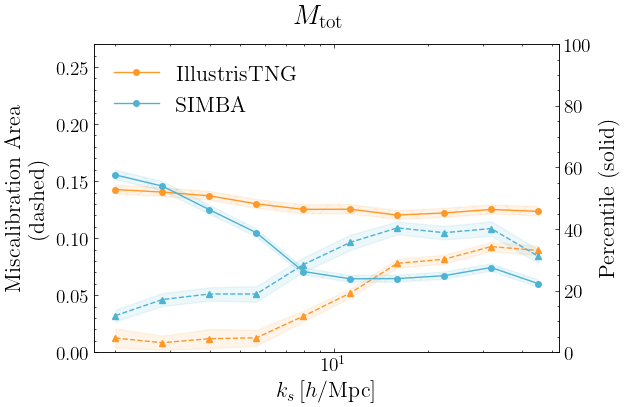

In [16]:
# Compute and plot miscalibration area
misc_area_A = np.trapz(np.abs(ecp_vals_A - ecp_levels_A[:, None]), ecp_levels_A[:, None], axis=-1)
misc_area_S = np.trapz(np.abs(ecp_vals_S - ecp_levels_S[:, None]), ecp_levels_S[:, None], axis=-1)
misc_area_I = np.trapz(np.abs(ecp_vals_I - ecp_levels_I[:, None]), ecp_levels_I[:, None], axis=-1)

# for IllustrisTNG, the first four k_s posterior are underconfident
for i in range(4):
    misc_area_I[i] = np.abs(np.trapz((ecp_levels_I[i]-ecp_vals_I[i]), ecp_levels_I[i], axis=-1))


## Plot
plt.style.use('science')
colors =  ['#f768a1', '#fe9929', '#4eb3d3',]
msize=4

f, ax1 = plt.subplots(1, 1, figsize=(6, 4))
f.suptitle(r'$M_{\mathrm{tot}}$', fontsize=20)

## Bias
# IllustrisTNG
misc_area_mean, misc_area_err = misc_area_I.mean(axis=-1), misc_area_I.std(axis=-1)
color = colors[1]
ax1.plot(k_smooth_array, misc_area_mean,
         c=color, marker='^', ls='--', markersize=msize)
ax1.fill_between(k_smooth_array, 
                 (misc_area_mean - misc_area_err), 
                 (misc_area_mean + misc_area_err), 
                 alpha=0.1, color=color)

# SIMBA
misc_area_mean, misc_area_err = misc_area_S.mean(axis=-1), misc_area_S.std(axis=-1)
color = colors[2]
ax1.plot(k_smooth_array, misc_area_mean,
         c=color, marker='^', ls='--', markersize=msize)
ax1.fill_between(k_smooth_array, 
                 (misc_area_mean - misc_area_err), 
                 (misc_area_mean + misc_area_err), 
                 alpha=0.1, color=color)

ax1.set_ylabel('Miscalibration Area \n(dashed)', fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.set_xlabel(r'$ k_s \, [h/\mathrm{Mpc}]$', fontsize=16)
ax1.set_xscale('log')
ax1.set_ylim(0, 0.27)


## Percentile
ax2 = ax1.twinx()

# IllustrisTNG
percentile_mean, percentile_err = percentile_I.mean(axis=1), percentile_I.std(axis=1)/np.sqrt(405)
color = colors[1]
line1, = ax2.plot(k_smooth_array, percentile_mean, 
         c=color, marker='o', markersize=msize)
ax2.fill_between(k_smooth_array, 
                 (percentile_mean - percentile_err), 
                 (percentile_mean + percentile_err), 
                 alpha=0.1, color=color, hatch="X")

# SIMBA
percentile_mean, percentile_err = percentile_S.mean(axis=1), percentile_S.std(axis=1)/np.sqrt(405)
color = colors[2]
line2, = ax2.plot(k_smooth_array, percentile_mean, 
         c=color, marker='o', markersize=msize)
ax2.fill_between(k_smooth_array, 
                 (percentile_mean - percentile_err), 
                 (percentile_mean + percentile_err), 
                 alpha=0.1, color=color, hatch="X")

ax2.set_ylabel('Percentile (solid)', fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.set_ylim(0, 100)

ax2.legend(handles=[line1, line2], labels=['IllustrisTNG', 'SIMBA'], loc='upper left', fontsize=16)
plt.savefig(f'plots/7_misc_area_vs_percentile_{field}.pdf')
f.show()
